# Matrimonios de los Valles Calchaquíes: Siglos XVIII y XIX:
                  
                   -CONSANGUINIDAD (Índice de consanguinidad y Coeficiente Alfa)
                   -RELACIÓN ENTRE POBLACIONES (Ri de Lasker)

## Carga del dataset y primera aproximación a los datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
matri=pd.read_excel('/Users/danielyazlle/Desktop/AHORA/PROYECTOS/TESIS/BASES/CSV/matrimonios.xlsx')

In [3]:
matri.head()

,Tabla 1,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39
0,ID,PARROQUIA,TOMO,PAGINA,MES,AÑO,AP1,AP2,STATUS1,CODST NOVIO,...,PROF2,CODPROMUJ1,CODPROMUJ2,CODPROMUJ3,LUGAR,CODLUGAR,GRANAREA1,GRANAREA2,HGEO1,HGEO2
1,1,CAFAYATE,CF 1,1,999,1839,OLAZO,DIAZ,INDIO,3,...,999,999,999,999,CAFAYATE,CAFAYATE,1,1,1,1
2,2,CAFAYATE,CF 1,1,1,1840,SALDAÑA,VELARDE,INDIO,3,...,999,999,999,999,CAFAYATE,CAFAYATE,1,1,1,1
3,3,CAFAYATE,CF 1,1,2,1840,GALLARDO,NIEVA,INDIO,3,...,999,999,999,999,CAFAYATE,CAFAYATE,1,1,1,1
4,4,CAFAYATE,CF 1,2,2,1840,ROJAS,ROMERO,INDIO,3,...,999,999,999,999,CAFAYATE,CAFAYATE,2,1,2,1


Se acomoda la primera fila como los nombres de las columnas

In [4]:
matri.columns = matri.iloc[0]
matri = matri.iloc[1:]

In [5]:
matri.head()

,ID,PARROQUIA,TOMO,PAGINA,MES,AÑO,AP1,AP2,STATUS1,CODST NOVIO,...,PROF2,CODPROMUJ1,CODPROMUJ2,CODPROMUJ3,LUGAR,CODLUGAR,GRANAREA1,GRANAREA2,HGEO1,HGEO2
1,1,CAFAYATE,CF 1,1,999,1839,OLAZO,DIAZ,INDIO,3,...,999,999,999,999,CAFAYATE,CAFAYATE,1,1,1,1
2,2,CAFAYATE,CF 1,1,1,1840,SALDAÑA,VELARDE,INDIO,3,...,999,999,999,999,CAFAYATE,CAFAYATE,1,1,1,1
3,3,CAFAYATE,CF 1,1,2,1840,GALLARDO,NIEVA,INDIO,3,...,999,999,999,999,CAFAYATE,CAFAYATE,1,1,1,1
4,4,CAFAYATE,CF 1,2,2,1840,ROJAS,ROMERO,INDIO,3,...,999,999,999,999,CAFAYATE,CAFAYATE,2,1,2,1
5,5,CAFAYATE,CF 1,2,2,1840,RIOS,FERNANDEZ,INDIO,3,...,999,999,999,999,CAFAYATE,CAFAYATE,1,1,1,1


El dataset está compuesto por 40 columnas muchas de ellas no sirven a los propositos de los análisis que se van a realizar

In [6]:
matri.columns

Index(['ID', 'PARROQUIA', 'TOMO', 'PAGINA', 'MES', 'AÑO', 'AP1', 'AP2',
       'STATUS1', 'CODST NOVIO', 'STATUS2', 'CODST NOVIA', 'CODMAT',
       'CONSANGUINIDAD', 'CONSCOD', 'CODCONSSINO', 'CODCONSGENER', 'EDAD1',
       'EDAD2', 'DIFEDAD', 'LUG1', 'LUG1COD', 'CODFINAL1', 'LUG2', 'LUG2COD',
       'CODFINAL2', 'PROF1', 'CODPROHOM1', 'CODPROHOM2', 'CODPROHOM3', 'PROF2',
       'CODPROMUJ1', 'CODPROMUJ2', 'CODPROMUJ3', 'LUGAR', 'CODLUGAR',
       'GRANAREA1', 'GRANAREA2', 'HGEO1', 'HGEO2'],
      dtype='object', name=0)

In [7]:
matri.shape

(11628, 40)

In [8]:
matri = matri.drop(['ID', 'PARROQUIA', 'TOMO', 'PAGINA','CODMAT',
       'CONSANGUINIDAD', 'CODCONSGENER', 'DIFEDAD', 'LUG1', 'LUG1COD', 'CODFINAL1', 'LUG2', 'LUG2COD',
       'CODFINAL2', 'CODPROHOM1', 'CODPROHOM2', 'CODPROHOM3', 
       'CODPROMUJ1', 'CODPROMUJ2', 'CODPROMUJ3', 'LUGAR',
       'GRANAREA1', 'GRANAREA2', 'HGEO1', 'HGEO2', 'PROF1', 'PROF2', 'EDAD1','EDAD2'], axis=1)

Los datos nulo de la base original fueron codificados con 999 y x por lo que pandas no los detecta como tal. Para eso es necesario reemplazarlos a nulos con np.NaN

In [9]:
matri.replace([999, 'x','X'],[np.NaN, np.NaN, np.NaN], inplace=True )

In [10]:
matri.isna().sum()

0
MES               28
AÑO                7
AP1               23
AP2               35
STATUS1         5030
CODST NOVIO     5038
STATUS2         5220
CODST NOVIA     5221
CONSCOD        11247
CODCONSSINO       98
CODLUGAR           0
dtype: int64

### Creación de columna con los matrimonios homogámicos por estatus

En la base de datos hay información del estatus del novio y la novia agrupados en 3 grandes categorías de filiación étnica (basadas en ascendencia o autoadscripción): africanos (1.0), europeos(2.0) y americanos (3.0). Para ver si hay consanguinidad diferencial o subpoblaciones dentro de cada grupo se puede analizar el Índice de Consanguinidad y el coeficiente Alfa de consanguinidad en los matrimonios endógamos, para eso es necesario crear la columna 'unionEtnia' con la que se codificaran los matrimonios entre contrayentes de un mismo estatus quedando como nulos los matrimonios mixtos.

In [11]:
matri.groupby(['CODST NOVIO','STATUS1']).size()

CODST NOVIO  STATUS1                   
1.0          ALGO NEGRO                       1
             CUARTERON                        1
             DE NEGRUZCO                      1
             ESCLAVO                         20
             MULATO                          40
             NEGRO                           23
             PARDO                            7
             PARDOS                           2
2.0          BLANCO                         280
             DON                            195
             ESPAÑOL                         50
             NOBLE                           46
3.0          CHOLO                           47
             COBRIZO                        395
             COLOR                          786
             DE TIERRA                        1
             INDIO                         2824
             INDIO                          713
             MESTIZO                        501
             MORENO                         422


In [12]:
matri= matri.drop(['STATUS1', 'STATUS2'], axis=1)

Con respecto a los matrimonios interétnicos se ve el predominio de los matrimonios entre miembros de un mismo estatus.

CODST NOVIO   1.0    2.0     3.0
CODST NOVIA                     
1.0          20.0    NaN    24.0
2.0           2.0  475.0    58.0
3.0          52.0   47.0  5605.0


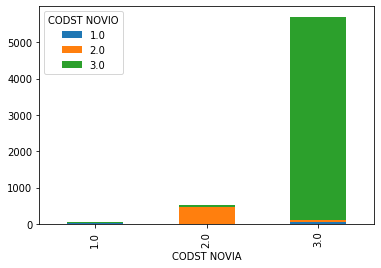

In [13]:
status=matri.groupby(['CODST NOVIO', "CODST NOVIA"]).size().reset_index().pivot(columns='CODST NOVIO', index='CODST NOVIA', values=0)
status.plot(kind='bar', stacked=True)
print(status)

In [14]:
matri['unionEtnia']=matri['CODST NOVIO'].astype(str) + matri['CODST NOVIA'].astype(str)
#matri['unionEtnia'].apply(x) x=np.nan if x.str.contains('nan')

In [15]:
matri.loc[matri['unionEtnia'].str.contains('nan'), 'unionEtnia'] = 'nulo'
matri['unionEtnia'].replace(['1.03.0','3.02.0','2.03.0','3.01.0','1.02.0','nulo','3.03.0','2.02.0','1.01.0'],
              [np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,'amer','euro','afro'], inplace=True)


Se observa que la gran mayoría de los matrimonios homógamos son entre individuos adscriptos a la categoría americanos

In [16]:
pie_status=matri['unionEtnia'].value_counts()
print(pie_status)
print('nulos', matri['unionEtnia'].isna().sum())

amer    5605
euro     475
afro      20
Name: unionEtnia, dtype: int64
nulos 5528


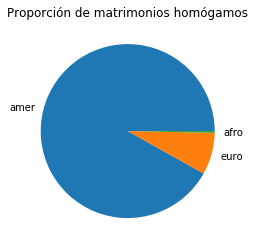

In [17]:
pie_status.plot(kind='pie', subplots=True, figsize=(4, 4))
plt.title("Proporción de matrimonios homógamos")
plt.ylabel("")
plt.show()

### Agrupamiento de los años en periodos

No es conveniente analizar año a año el índice de consanguinidad ni el coeficiente alfa por lo que es mejor agrupar los años por periodos, en este caso en períodos de 20 años aprox.

In [18]:
bins = pd.IntervalIndex.from_tuples([(1778, 1799), (1800, 1819), (1820, 1839), (1840,1859), (1860,1879), 
                                         (1880,1899)])
matri['PERIODO']=pd.cut(matri['AÑO'], bins)

In [19]:
matri['PERIODO'].value_counts().sort_index()

(1778, 1799]     383
(1800, 1819]     908
(1820, 1839]    1490
(1840, 1859]    2434
(1860, 1879]    2910
(1880, 1899]    2885
Name: PERIODO, dtype: int64

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

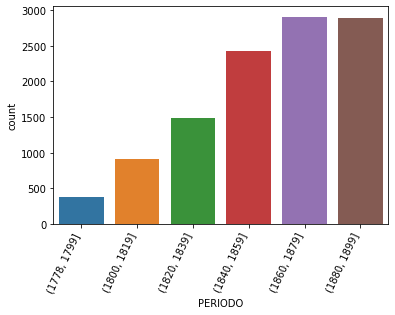

In [20]:
ax = sns.countplot(x="PERIODO", data=matri)
plt.xticks(rotation=65, horizontalalignment='right')

## ÍNDICE DE CONSANGUINIDAD

El índice de Consanguinidad no es más que el porcentaje de matrimonios consanguineos sobre los matrimonios totales y junto con el coeficiente alfa es una medida util para estimar la consanguinidad en una población. Los datos fueron extraídos de las actas matrimoniales de las distintas iglesias católicas de la zona que estaban obligadas a investigar e informar si había parentesco entre los futuros contrayentes. En caso de haberlo debían dispensarlo primero. 

La columna CODCONSSINO tiene por valor 1 a todos los matrimonios donde se informó consanguinidad y 2 los no consanguíneos

In [21]:
matri['CODCONSSINO'].value_counts()

2.0    11247
1.0      283
Name: CODCONSSINO, dtype: int64

Primero calculamos la consanguinidad para todo el dataset

In [22]:
def ICO():
    IC= round(len(matri[matri.CODCONSSINO == 1.0])/len(matri) *100, 1)
    print('Indice de consanguinidad = ', IC, '%')
    return IC

ICO()

Indice de consanguinidad =  2.4 %


2.4

Es interesante estudiar la consanguinidad según distintos períodos o condiciones para lo cual se programa la función ICons que calcula el IC  en base a las tablas generadas por groupby y tablas pivot pudiendo segmentar el análisis por una o dos condiciones

In [23]:

def ICons(x, **kwargs):
    if 'y' in kwargs:
        tabla=matri.groupby([x, kwargs['y'],'CODCONSSINO' ]).size().reset_index()
        pivote = pd.pivot_table(tabla, columns='CODCONSSINO', index=[x,kwargs['y']], values=0, fill_value=0)
    else:
        tabla=matri.groupby([x,'CODCONSSINO' ]).size().reset_index()
        pivote = pd.pivot_table(tabla, columns='CODCONSSINO', index=x, values=0, fill_value=0)
#RENOMBRAMOS COLUMNAS
    colIC=['conSi','conNo']
    pivote.rename(columns=dict(zip(pivote.columns, colIC)),inplace=True)
#CREAMOS LA COLUMNA CON EL CÁLCULO DEL ÍNDICE DE CONSANGUINIDAD    
    pivote['IC']= round((pivote['conSi'] / (pivote['conSi'] + pivote['conNo'])*100),2)
       
    return pivote


Se observa al departamento de Cafayate con el mayor IC y Cachi el menor

In [24]:
ICons('CODLUGAR')

CODCONSSINO,conSi,conNo,IC
CODLUGAR,,,
CACHI,42,2787,1.48
CAFAYATE,80,1742,4.39
LA POMA,12,343,3.38
LOS ANDES,7,245,2.78
MOLINOS,63,3324,1.86
SAN CARLOS,79,2806,2.74


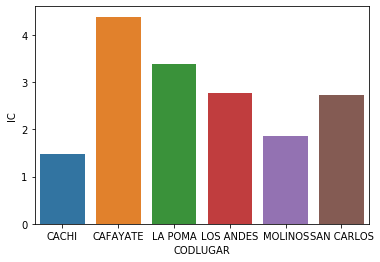

In [25]:
IC_lugar=ICons('CODLUGAR')
IC_lugar.reset_index(level=0, inplace=True)
ax = sns.barplot(x="CODLUGAR", y="IC", data=IC_lugar)

Con respecto a la tendencia temporal del IC se ve un crecimiento notable desde 1840 en adelante

In [26]:
ICons('PERIODO')

CODCONSSINO,conSi,conNo,IC
PERIODO,,,
"(1778, 1799]",2,380,0.52
"(1800, 1819]",5,903,0.55
"(1820, 1839]",8,1476,0.54
"(1840, 1859]",59,2323,2.48
"(1860, 1879]",98,2789,3.39
"(1880, 1899]",100,2778,3.47


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

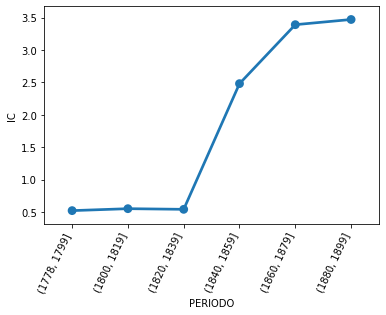

In [27]:
IC_periodo=ICons('PERIODO')
IC_periodo.reset_index(level=0, inplace=True)
ax = sns.pointplot(x="PERIODO", y="IC",data=IC_periodo)
plt.xticks(rotation=65, horizontalalignment='right')

En cuanto al estatus el grupo de europeos es notablemente más consanguíneo que los americanos. No hay matrimonios consanguíneos en los matrimonios de estatus afro.

In [28]:
ICons('unionEtnia')

CODCONSSINO,conSi,conNo,IC
unionEtnia,,,
afro,0,20,0.00
amer,112,5470,2.01
euro,67,397,14.44


En cuanto a la tendencia temporal del IC por departamento los picos en matrimonios consanguíneos se dan en los departamentos puneños (La Poma y Los Andes) en el período 1860-1879 y en los departamentos del sur Calchaquí (Cafayate y San Carlos) en 1880-1899, en este periodo los departamentos centrales de los valles muestran una baja del índice.

In [29]:
ICons('CODLUGAR', y='PERIODO')

CODCONSSINO              conSi  conNo    IC
CODLUGAR   PERIODO                         
CACHI      (1778, 1799]      0     92  0.00
           (1800, 1819]      1    185  0.54
           (1820, 1839]      1    483  0.21
           (1840, 1859]      2    472  0.42
           (1860, 1879]     23    659  3.37
           (1880, 1899]     14    699  1.96
CAFAYATE   (1778, 1799]      0      1  0.00
           (1820, 1839]      0     23  0.00
           (1840, 1859]      1    339  0.29
           (1860, 1879]     18    524  3.32
           (1880, 1899]     60    812  6.88
LA POMA    (1820, 1839]      0     14  0.00
           (1840, 1859]      1     70  1.41
           (1860, 1879]      9    126  6.67
           (1880, 1899]      1    120  0.83
LOS ANDES  (1778, 1799]      0     26  0.00
           (1820, 1839]      0     34  0.00
           (1840, 1859]      0     94  0.00
           (1860, 1879]      5     57  8.06
           (1880, 1899]      2     30  6.25
MOLINOS    (1778, 1799]      2    251  0.79
           (1800, 1819]      4    402  0.99
           (1820, 1839]      2    583  0.34
           (1840, 1859]     27    613  4.22
           (1860, 1879]     21    624  3.26
           (1880, 1899]      5    656  0.76
SAN CARLOS (1778, 1799]      0     10  0.00
           (1800, 1819]      0    316  0.00
           (1820, 1839]      5    339  1.45
           (1840, 1859]     28    735  3.67
           (1860, 1879]     22    799  2.68
           (1880, 1899]     18    461  3.76

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

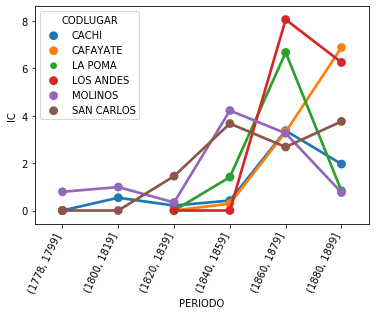

In [30]:
ICons_lug_per=ICons('CODLUGAR', y='PERIODO')
ICons_lug_per.reset_index(level=(0,1), inplace=True)
ax = sns.pointplot(x="PERIODO", y="IC", hue="CODLUGAR",
                   data=ICons_lug_per)
plt.xticks(rotation=65, horizontalalignment='right')

In [31]:
ICons('PERIODO', y='unionEtnia')

CODCONSSINO              conSi  conNo     IC
PERIODO      unionEtnia                     
(1778, 1799] afro            0      1   0.00
             amer            2    245   0.81
             euro            0      6   0.00
(1800, 1819] afro            0     10   0.00
             amer            0    478   0.00
             euro            2     34   5.56
(1820, 1839] afro            0      4   0.00
             amer            1    613   0.16
             euro            6     42  12.50
(1840, 1859] afro            0      2   0.00
             amer           33    912   3.49
             euro           14     52  21.21
(1860, 1879] afro            0      1   0.00
             amer           30   1189   2.46
             euro           26    118  18.06
(1880, 1899] afro            0      1   0.00
             amer           40   1805   2.17
             euro           18    129  12.24

Desde 1800 en adelante es notablemente mayor el IC en matrimonios europeos comparado con matrimonios entre americanos

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

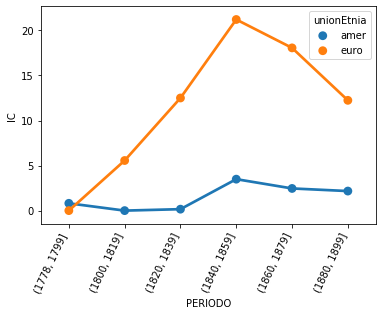

In [32]:
ICons_per_est=ICons('PERIODO', y='unionEtnia')
ICons_per_est.reset_index(level=(0,1), inplace=True)
ICons_per_est=ICons_per_est[ICons_per_est.unionEtnia != 'afro']
ax = sns.pointplot(x="PERIODO", y="IC", hue="unionEtnia",data=ICons_per_est)
plt.xticks(rotation=65, horizontalalignment='right')

La consanguinidad es mayor en europeos también en todos los departamentos menos en el departamento puneño de Los Andes donde el único matrimonio europeo no registra consanguinidad. en La Poma se da la situación contraria donde el IC de este grupo llega al 30%, hay que señalar que aquí también se calcula el índice en base a solamente 7 casos

In [33]:
ICons('CODLUGAR', y='unionEtnia')

CODCONSSINO            conSi  conNo     IC
CODLUGAR   unionEtnia                     
CACHI      afro            0      2   0.00
           amer           15    832   1.77
           euro            8     63  11.27
CAFAYATE   afro            0      1   0.00
           amer           22    721   2.96
           euro           20    139  12.58
LA POMA    amer            4    143   2.72
           euro            3      7  30.00
LOS ANDES  amer            5     77   6.10
           euro            0      1   0.00
MOLINOS    amer           31   2088   1.46
           euro            8     54  12.90
SAN CARLOS afro            0     17   0.00
           amer           35   1609   2.13
           euro           28    133  17.39

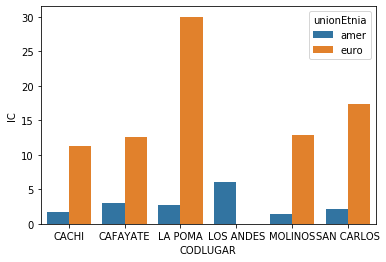

In [34]:
IC_lug_est=ICons('CODLUGAR', y='unionEtnia')
IC_lug_est.reset_index(level=(0,1), inplace=True)
IC_lug_est=IC_lug_est[IC_lug_est.unionEtnia != 'afro']
ax = sns.barplot(x="CODLUGAR", y="IC", hue="unionEtnia",
                   data=IC_lug_est)

## COEFICIENTE ALFA DE CONSANGUINIDAD

El Coeficiente de Consanguinidad α de Bernstein (Cavalli-Sforza y Bodmer, 1981), estima la probabilidad promedio de homocigosis en una población dada (Sánchez Compadre, 1989):

α = Σp𝑖 ∗ F𝑖 / 𝑁𝑡

Donde pi es la frecuencia relativa de cada tipo de matrimonio consanguíneo, Fi la consanguinidad de cada unión y Nt el total de matrimonios (Barreto, 2011).

Los grados de consanguinidad fueron codificadas de la siguiente manera, entre parentesis la consanguinidad de cada unión de alguno de los tipos de uniones encontradas:

1. C: Uniones consanguíneas donde no se manifiesta el grado de consanguinidad.
2. I: Uniones donde se dispensa impedimentos pero no se especifica si es de afinidad o consanguinidad.
3. C1-2: Consanguinidad en segundo grado con atingencia al primero, casamiento entre tío/a y sobrino/a. (0,1250)
4. C1-3: Consanguinidad en tercer grado con atingencia al segundo, casamiento entre tío/a abuelo/a y sobrino/a nieto/a. (0,0625)
5. C2: Consanguinidad en segundo grado, casamiento entre primos hermanos. (0,0625)
6. C2-3: Consanguinidad en tercer grado con atingencia al segundo, casamiento entre tío/a con sobrino/a segundo/a. (0,0313)
7. C2-4: Consanguinidad en cuarto grado con atingencia al segundo, casamiento entre tío/a abuelo/a y sobrino/a segundo/a. (0,0156)
8. C3: Consanguinidad en tercer grado, casamiento entre primos segundos. (0,0156)
9. C3-4: Consanguinidad en cuarto grado con atingencia al tercero, casamiento entre tío/a con sobrino/a tercero/a. (0,0078)
10. C4: Consanguinidad en cuarto grado, casamiento entre primos terceros. (0,0039)


Los valores de CONSCOD se refieren a la union consanguínea que hay en el matrimonio siendo la mas consaguínea la union C1-2 (entre tío y sobrina) y la menos consanguínea que se registraba en la época c4 (entre primos terceros)

In [35]:
codigos=matri['CONSCOD'].unique()
print(codigos)

[nan 'I' 'C3' 'C3-4' 'C1-2' 'C2-3 Y C3-4' 'C2-3' 'C2' 'C4' 'C2  Y 3 Y 4'
 'C2 Y C3-4' 'C2 ' 'C2 Y C3' 'C' 'C2-3 Y 3-4' 'C2-3 ' 'C ' 'C2-4'
 'C4 Y C3-4' 'C2-3 Y C4' 'C2-3 Y 3' 'C1-3']


Como se puede observar hubo errores en la carga de datos y por espacios de más a la hora de ingresar los datos
se crean categorias duplicadas. Se lo soluciona reemplazando valores. Como no son tantos se puede hacer a mano, en el caso de la variable apellidos se utiliza la función str.strip

In [36]:
matri['CONSCOD'].replace(['C2 ', 'C ', 'C2-3 ', 'C2-3 Y 3-4'], ['C2', 'C', 'C2-3', 'C2-3 Y C3-4'], inplace=True)

Los valores de I son actas donde se manifiesta un grado de parentesco pero no si es por consanguinidad o afinidad
(por ejemplo parentescos políticos) y los valores de C que reportan consanguinidad pero no en que grado por lo que
no puede calcularse el valor de F, estos valores no son imputados, se toman como matrimonios no consanguineos, esta decisión depende de cada investigador.

Como se observa la unión consanguinea mas frecuente es en tercer grado (casamiento entre primos segundos) seguida por el casamiento entre primos hermanos

In [37]:
dispensas=matri['CONSCOD'].value_counts()
print(dispensas)
#para generar el pie chart de dispensas agrupando los valores con menos de diez casos para mejor visualización
otros=pd.Series()
otros=dispensas[dispensas<10] 
otros=pd.Series(otros.sum())
#debemos ponerle nombre al index de la suma
index_=['otros']
otros.index=index_
dispensas=pd.Series(dispensas[dispensas>10])
dispensas = pd.concat([dispensas, otros])

I              98
C3             94
C2             69
C4             34
C3-4           26
C2-3           25
C              16
C1-2            7
C2 Y C3-4       2
C2 Y C3         2
C2-3 Y C3-4     2
C1-3            1
C2  Y 3 Y 4     1
C2-3 Y 3        1
C4 Y C3-4       1
C2-4            1
C2-3 Y C4       1
Name: CONSCOD, dtype: int64


In [38]:
print(dispensas)

I        98
C3       94
C2       69
C4       34
C3-4     26
C2-3     25
C        16
otros    19
dtype: int64


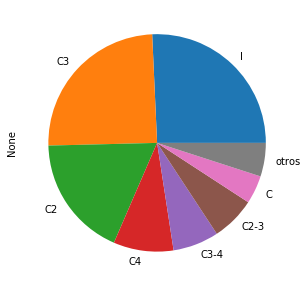

In [39]:
plot = dispensas.plot.pie(figsize=(5, 5))

Para poder hacer la columna donde estará la consanguinidad de cada union es más práctico tener la lista de códigos de consanguinidad en orden.
Con esta nueva columna FCONS se podrá hacer la suma de la consanguinidad total para el coeficiente alfa de cada población.

In [40]:
codigos = codigos[2:]
sorted(codigos)

['C',
 'C ',
 'C1-2',
 'C1-3',
 'C2',
 'C2 ',
 'C2  Y 3 Y 4',
 'C2 Y C3',
 'C2 Y C3-4',
 'C2-3',
 'C2-3 ',
 'C2-3 Y 3',
 'C2-3 Y 3-4',
 'C2-3 Y C3-4',
 'C2-3 Y C4',
 'C2-4',
 'C3',
 'C3-4',
 'C4',
 'C4 Y C3-4']

In [41]:
matri['FCONS']=matri['CONSCOD'].copy()

In [42]:
matri['FCONS'].replace([np.nan,'I','C','C1-2','C1-3','C2','C2  Y 3 Y 4','C2 Y C3','C2 Y C3-4','C2-3','C2-3 Y 3','C2-3 Y C3-4',
 'C2-3 Y C4','C2-4','C3','C3-4','C4','C4 Y C3-4'], 
[0,0,0,0.125,0.0625,0.0625,0.08203125,0.078125,0.0703125,0.03125,0.046875,0.0390625,0.03515625,0.015625,0.015625,
 0.0078125,0.00390625,0.01171875], inplace=True)

In [43]:
matri['FCONS'].value_counts()

0.000000    11361
0.015625       95
0.062500       70
0.003906       34
0.007812       26
0.031250       25
0.125000        7
0.070312        2
0.078125        2
0.039062        2
0.035156        1
0.082031        1
0.046875        1
0.011719        1
Name: FCONS, dtype: int64

El coeficiente alfa de todo el dataset puede ser calculado con la función sum dividiendo el resultado por la cantidad de matrimonios. Para el caso en que se desee calcularla según distintas combinaciones puede hacerse mediante la creación de distintas tablas con groupby, para eso la función alfa2

In [44]:
alfa_total= matri['FCONS'].sum()/len(matri)
print(alfa_total)

0.0007225957817337461


In [45]:
def alfa2(x, **kwargs):
    if 'y' in kwargs:
        tabla_f=matri.groupby([x,kwargs['y'],'FCONS']).size().reset_index()
        tabla_f.rename(columns={0:'N'}, inplace=True)
        tabla_f['FSUM']=tabla_f['FCONS']*tabla_f['N']
        tabla_alfa=tabla_f.groupby([x,kwargs['y']]).sum().reset_index()
        tabla_alfa['alfa']= round(tabla_alfa['FSUM']/tabla_alfa['N'],5)
    else:
        tabla_f=matri.groupby([x,'FCONS']).size().reset_index()
        tabla_f.rename(columns={0:'N'}, inplace=True)
        tabla_f['FSUM']=tabla_f['FCONS']*tabla_f['N']
        tabla_alfa=tabla_f.groupby([x]).sum().reset_index()
        tabla_alfa['alfa']= round(tabla_alfa['FSUM']/tabla_alfa['N'],5)
    
    return tabla_alfa                

En lineas generales los análisis del coeficiente alfa reflejan la misma tendencia que los del IC con el grupo de europeos como el más consanguíneo y un crecimiento de la consanguinidad a partir de 1840 con el departamento de Cafayate como el que presenta mayor consanguinidad.

In [46]:
alfa2('unionEtnia')

,unionEtnia,FCONS,N,FSUM,alfa
0,afro,0.000000,20,0.000000,0.00000
1,amer,0.343750,5605,3.535156,0.00063
2,euro,0.433594,475,2.277344,0.00479


In [47]:
alfa2('PERIODO')

,PERIODO,FCONS,N,FSUM,alfa
0,"(1778, 1799]",0.062500,383,0.125000,0.00033
1,"(1800, 1819]",0.093750,908,0.218750,0.00024
2,"(1820, 1839]",0.082031,1490,0.207031,0.00014
3,"(1840, 1859]",0.230469,2434,1.550781,0.00064
4,"(1860, 1879]",0.378906,2910,2.777344,0.00095
5,"(1880, 1899]",0.406250,2885,3.410156,0.00118


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

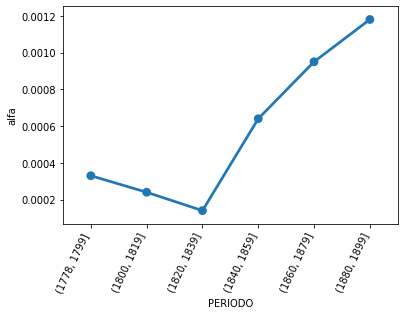

In [48]:
alfa_periodo=alfa2('PERIODO')
alfa_periodo.reset_index(level=0, inplace=True)
ax = sns.pointplot(x="PERIODO", y="alfa",data=alfa_periodo)
plt.xticks(rotation=65, horizontalalignment='right')

In [49]:
alfa2('CODLUGAR')

,CODLUGAR,FCONS,N,FSUM,alfa
0,CACHI,0.328125,2869,1.226562,0.00043
1,CAFAYATE,0.367188,1832,2.714844,0.00148
2,LA POMA,0.117188,359,0.265625,0.00074
3,LOS ANDES,0.082031,252,0.269531,0.00107
4,MOLINOS,0.132812,3412,1.632812,0.00048
5,SAN CARLOS,0.308594,2904,2.292969,0.00079


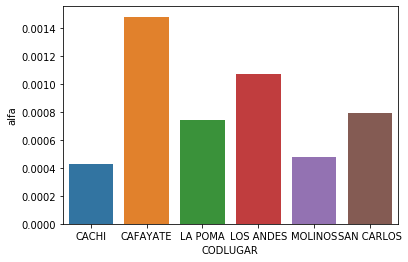

In [50]:
alfa_lugar=alfa2('CODLUGAR')
alfa_lugar.reset_index(level=0, inplace=True)
ax = sns.barplot(x="CODLUGAR", y="alfa", data=alfa_lugar)

In [51]:
alfa2('unionEtnia',y='PERIODO')

,unionEtnia,PERIODO,FCONS,N,FSUM,alfa
0,afro,"(1778, 1799]",0.000000,1,0.000000,0.00000
1,afro,"(1800, 1819]",0.000000,10,0.000000,0.00000
2,afro,"(1820, 1839]",0.000000,4,0.000000,0.00000
3,afro,"(1840, 1859]",0.000000,2,0.000000,0.00000
4,afro,"(1860, 1879]",0.000000,1,0.000000,0.00000
5,afro,"(1880, 1899]",0.000000,1,0.000000,0.00000
6,amer,"(1778, 1799]",0.062500,247,0.125000,0.00051
7,amer,"(1800, 1819]",0.000000,478,0.000000,0.00000
8,amer,"(1820, 1839]",0.062500,616,0.062500,0.00010
9,amer,"(1840, 1859]",0.152344,951,0.972656,0.00102


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

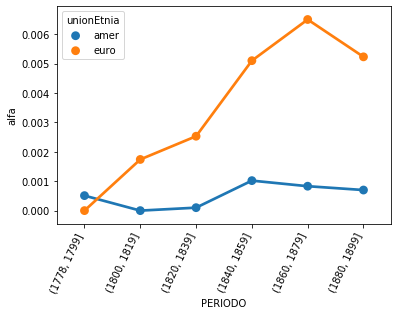

In [52]:
alfa_est_per=alfa2('unionEtnia',y='PERIODO')
alfa_est_per=alfa_est_per[alfa_est_per.unionEtnia != 'afro']
ax = sns.pointplot(x="PERIODO", y="alfa", hue="unionEtnia",
                   data=alfa_est_per)
plt.xticks(rotation=65, horizontalalignment='right')

In [53]:
alfa2('CODLUGAR',y='PERIODO')

,CODLUGAR,PERIODO,FCONS,N,FSUM,alfa
0,CACHI,"(1778, 1799]",0.000000,92.0,0.000000,0.00000
1,CACHI,"(1800, 1819]",0.062500,186.0,0.062500,0.00034
2,CACHI,"(1820, 1839]",0.015625,484.0,0.015625,0.00003
3,CACHI,"(1840, 1859]",0.000000,504.0,0.000000,0.00000
4,CACHI,"(1860, 1879]",0.328125,684.0,0.496094,0.00073
5,CACHI,"(1880, 1899]",0.214844,715.0,0.636719,0.00089
6,CAFAYATE,"(1778, 1799]",0.000000,1.0,0.000000,0.00000
7,CAFAYATE,"(1800, 1819]",NaN,NaN,NaN,NaN
8,CAFAYATE,"(1820, 1839]",0.000000,24.0,0.000000,0.00000
9,CAFAYATE,"(1840, 1859]",0.015625,345.0,0.015625,0.00005


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

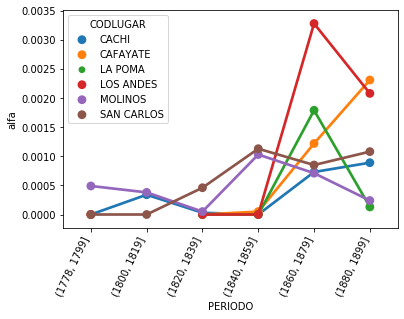

In [54]:
alfa_lug_per=alfa2('CODLUGAR',y='PERIODO')
ax = sns.pointplot(x="PERIODO", y="alfa", hue="CODLUGAR",
                   data=alfa_lug_per)
plt.xticks(rotation=65, horizontalalignment='right')

En cuanto a las agrupaciones según el coeficiente alfa se pueden observar algunas variaciones con respecto al IC debido a que el IC mide la cantidad de matrimonios consanguíneos mientras que el coeficeinte alfa la probabilidad de homocigosis en base al tipo de unión por lo que por ejemplo Cafayate a pesar de tener un IC más alto que cualquier otro departamento tiene un coeficiente alfa similar al de Cachi. Esto se debe a que las uniones consanguíneas en Cafayate eran entre parientes más lejanos entre si.

In [55]:
alfa2('CODLUGAR',y='unionEtnia')

,CODLUGAR,unionEtnia,FCONS,N,FSUM,alfa
0,CACHI,afro,0.000000,2,0.000000,0.00000
1,CACHI,amer,0.261719,849,0.449219,0.00053
2,CACHI,euro,0.242188,73,0.367188,0.00503
3,CAFAYATE,afro,0.000000,1,0.000000,0.00000
4,CAFAYATE,amer,0.246094,749,0.808594,0.00108
5,CAFAYATE,euro,0.328125,159,0.800781,0.00504
6,LA POMA,amer,0.117188,148,0.117188,0.00079
7,LA POMA,euro,0.046875,11,0.046875,0.00426
8,LOS ANDES,amer,0.066406,82,0.253906,0.00310
9,LOS ANDES,euro,0.000000,1,0.000000,0.00000


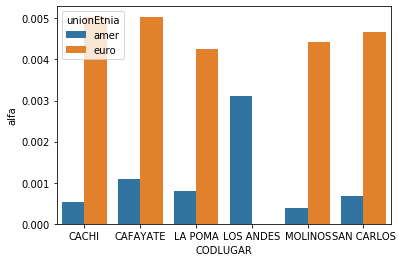

In [56]:
alfa_est_lug=alfa2('CODLUGAR',y='unionEtnia')
alfa_est_lug=alfa_est_lug[alfa_est_lug.unionEtnia != 'afro']
ax = sns.barplot(x="CODLUGAR", y="alfa", hue='unionEtnia', data=alfa_est_lug)

# COEFICIENTE Ri de Lasker


El Coeficiente de Parentesco (Ri) permite inferir la relación entre poblaciones o grupos de una población a través de la repetición de los apellidos (Lasker, 1977), partiendo del supuesto que la identidad de apellidos implica un origen común de los portadores.

Tanto para este Coeficiente como para todos los cálculos de isonimia, se tomó el primer apellido de cada conyugue en las actas matrimoniales y se consideraron válidos los casos en los apellidos de ambos cónyuges figuran en el acta:

Ri = ∑(Xa1 ∗ Xa2) / (2∗N1 ∗N2)

Xa1 = frecuencia del apellido a en la población 1
Xa2 = frecuencia del mismo apellido en la población 2 N1 = cantidad de apellidos en la población 1
N2 = cantidad de apellidos en la población 2

El Coeficiente R varía entre 0 y 0,5. En los casos extremos, R = 0 si no se observan apellidos comunes entre las poblaciones y R = 0,5 si se presenta un único apellido en ambas poblaciones.


Para el coeficiente Ri se necesitan los apellidos de los contrayentes del matrimonio indistintamente sean del novio o la novia por lo que el primer paso es crear un dataframe único con el conjunto de todos los apellidos.

Se utiliza la función strip ya que por errores de tipeo hay apellidos que figuran erroneamente duplicados por tener
espacios en blanco al final. Por ejemplo 'AGUIRRE' y 'AGUIRRE '

In [57]:
def lista_apellidos():
    varones=matri.groupby(['CODLUGAR','AP1']).size().reset_index()
    varones.rename(columns = {'AP1':'AP', 0:'freq'}, inplace = True) 
    mujeres=matri.groupby(['CODLUGAR','AP2']).size().reset_index()
    mujeres.rename(columns = {'AP2':'AP', 0:'freq'}, inplace = True) 
    frames=[varones,mujeres]
    todos=pd.concat(frames)
    todos['AP']=todos['AP'].str.strip()
#Ahora tenemos una columna con el conteo de cada apellido pero tenemos valores repetidos por departamento
#ya que todavía se agrupan diferencialmente por sexo del contrayente por lo que conviene realizar otro groupby 
    todos=todos.groupby(['CODLUGAR','AP']).sum().reset_index()
    todos.sort_values(by=['AP'], inplace=True)
    
    return todos
lista_apellidos()

,CODLUGAR,AP,freq
0,CACHI,ABAN,1
968,LA POMA,ABAN,1
1221,MOLINOS,ABAN,9
1638,SAN CARLOS,ABAN,2
1,CACHI,ABANO,1
...,...,...,...
1636,MOLINOS,ZURATE,1
966,CAFAYATE,ZURITA,1
967,CAFAYATE,ZUÑIGA,3
1637,MOLINOS,ZUÑIGA,1


Para poder trabajar correctamente se hace una tabla pivot de frecuencia de apellidos poniendo como índice los apellidos y como columnas los departamentos. Esta tabla nos servirá para el divisor del coeficiente que es la cantidad de apellidos en cada departamento.

In [58]:
def freq_lug():
    todos=lista_apellidos()
    tabla_R=todos.pivot(index='AP', columns='CODLUGAR', values='freq')
    tabla_R.fillna(0, inplace=True)
    return tabla_R
print()
freq_lug()

CODLUGAR,CACHI,CAFAYATE,LA POMA,LOS ANDES,MOLINOS,SAN CARLOS
AP,,,,,,
ABAN,1.0,0.0,1.0,0.0,9.0,2.0
ABANO,1.0,0.0,0.0,0.0,0.0,0.0
ABAYAR,0.0,2.0,0.0,0.0,0.0,0.0
ABRACAITE,1.0,0.0,0.0,0.0,0.0,0.0
ABREGO,0.0,3.0,0.0,0.0,0.0,4.0
...,...,...,...,...,...,...
ZUBIETA,1.0,1.0,0.0,0.0,1.0,0.0
ZULETA,1.0,8.0,0.0,0.0,18.0,1.0
ZURATE,0.0,0.0,0.0,0.0,1.0,0.0


El dividendo del coeficiente es la sumatoria de la multiplicación de la frecuencia de apellidos entre cada par de departamentos. El primer paso por lo tanto es generar todas las combinaciones posibles sin repetición y  multiplicar la frecuencia de sus apellidos. Esto es posible gracias al módulo itertools.

In [59]:
def freq_comb():    
    tabla_R= freq_lug()
    from itertools import chain, combinations
    #hacemos una lista con todas las combinaciones posibles
    comb = list(combinations(tabla_R.columns,2))
    #multiplicación de los valores de cada combinación
    R_tabla2 = pd.concat([tabla_R.loc[:,c].product(axis=1) for c in comb], axis=1)
    #creamos las columbas en base a las combinaciones
    R_tabla2.columns = [' - '.join(x) for x in comb]
    R_tabla2.head(20)
    return R_tabla2
freq_comb()

,CACHI - CAFAYATE,CACHI - LA POMA,CACHI - LOS ANDES,CACHI - MOLINOS,CACHI - SAN CARLOS,CAFAYATE - LA POMA,CAFAYATE - LOS ANDES,CAFAYATE - MOLINOS,CAFAYATE - SAN CARLOS,LA POMA - LOS ANDES,LA POMA - MOLINOS,LA POMA - SAN CARLOS,LOS ANDES - MOLINOS,LOS ANDES - SAN CARLOS,MOLINOS - SAN CARLOS
AP,,,,,,,,,,,,,,,
ABAN,0.0,1.0,0.0,9.0,2.0,0.0,0.0,0.0,0.0,0.0,9.0,2.0,0.0,0.0,18.0
ABANO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ABAYAR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ABRACAITE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ABREGO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZUBIETA,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ZULETA,8.0,0.0,0.0,18.0,1.0,0.0,0.0,144.0,8.0,0.0,0.0,0.0,0.0,0.0,18.0
ZURATE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


El siguiente paso es obtener la sumatoria de apellidos en cada departamento para el divisor y la sumatoria de la multiplicación de las frecuencias por combinación para el divisor

In [60]:
def tablas_finales():
    from itertools import chain, combinations
    tabla_R= freq_lug()
    R_tabla2=freq_comb()
    #generamos la tabla final en donde 
    #en base a la tabla con la multiplicacion de la frecuencia de los apellidos por cada combinación se crea la 
    #columna con la sumatoria de los resultados de cada multiplicación que es el dividendo del coeficiente
    R_final=R_tabla2.sum(axis=0).reset_index()
    R_final.rename(columns = {0:'dividendo'}, inplace = True) 
    
    #print(R_final)
    
    #Luego generamos una tabla con la frecuencia de cada apellido para el divisor
    R_divisor=tabla_R.sum(axis=0).reset_index()
    R_divisor.rename(columns = {0:'freq'}, inplace = True) 
    
    #print(R_divisor)
    
    #Luego las combinaciones posibles multiplicadas por 2, 
    #para obtener de esta forma ya resuelto el divisor del coeficiente
    R_divisor = list(combinations(R_divisor.freq,2))
    
    #print(R_divisor)
    
    comb_divisor=[]
    for i in R_divisor:
        j=np.prod(i)*2
        comb_divisor.append(j)
    R_final['divisor']=comb_divisor
    R_final['Ri']=round(R_final['dividendo']/R_final['divisor'],4)
    return R_final

La tabla final generada muestra el coeficiente Ri por par de departamentos, como es de esperar hay mayor similitud entre pares de departamentos limítrofes

In [61]:
ri=tablas_finales()
ri=ri.sort_values(['Ri'], ascending=False)
print(ri)

                     index  dividendo     divisor      Ri
9      LA POMA - LOS ANDES     6075.0    714568.0  0.0085
14    MOLINOS - SAN CARLOS   518248.0  78947004.0  0.0066
1          CACHI - LA POMA    42004.0   8185312.0  0.0051
2        CACHI - LOS ANDES    26746.0   5704568.0  0.0047
7       CAFAYATE - MOLINOS   207305.0  49878480.0  0.0042
8    CAFAYATE - SAN CARLOS   165442.0  42404760.0  0.0039
5       CAFAYATE - LA POMA    17608.0   5241120.0  0.0034
3          CACHI - MOLINOS   238013.0  77897648.0  0.0031
4       CACHI - SAN CARLOS   202352.0  66225576.0  0.0031
11    LA POMA - SAN CARLOS    25958.0   8295576.0  0.0031
6     CAFAYATE - LOS ANDES    10699.0   3652680.0  0.0029
13  LOS ANDES - SAN CARLOS    16851.0   5781414.0  0.0029
0         CACHI - CAFAYATE   115623.0  41841120.0  0.0028
10       LA POMA - MOLINOS    24741.0   9757648.0  0.0025
12     LOS ANDES - MOLINOS    13127.0   6800372.0  0.0019


La mejor forma de visualizarlo es mediante una matriz y su correspondiente heatmap por lo que es mejor crearla en base a la lista generada anteriormente

In [62]:
def Ri_matriz():
    matriz_ri=tablas_finales()
    matriz_ri.rename(columns = {'index':'comb'}, inplace = True) 
    matriz_ri[['dpto1', 'dpto2']] = matriz_ri['comb'].str.split('-', expand = True)
    matriz_ri.drop(['dividendo', 'divisor', 'comb'], axis=1, inplace=True)
    matriz= pd.crosstab(index=matriz_ri.iloc[:,2], columns=matriz_ri.iloc[:,1], 
                      values=matriz_ri.iloc[:,0], aggfunc='sum')
    return matriz

In [63]:
matriz=Ri_matriz()
print(matriz)

dpto1        CACHI   CAFAYATE   LA POMA   LOS ANDES   MOLINOS 
dpto2                                                         
 CAFAYATE    0.0028        NaN       NaN         NaN       NaN
 LA POMA     0.0051     0.0034       NaN         NaN       NaN
 LOS ANDES   0.0047     0.0029    0.0085         NaN       NaN
 MOLINOS     0.0031     0.0042    0.0025      0.0019       NaN
 SAN CARLOS  0.0031     0.0039    0.0031      0.0029    0.0066


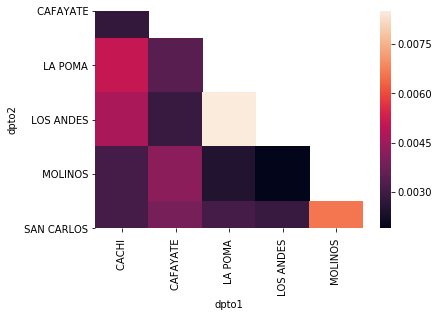

In [64]:
ax = sns.heatmap(matriz)